# **DATA UNDERSTANDING**
As players progress through the levels of the game, they will occasionally encounter gates that force them to wait a non-trivial amount of time or make an in-app purchase to progress. In addition to driving in-app purchases, these gates serve the important purpose of giving players an enforced break from playing the game, hopefully resulting in that the player's enjoyment of the game being increased and prolonged.

But where should the gates be placed? Initially the first gate was placed at level 30. In this project, we're going to analyze an AB-test where we moved the first gate in Cookie Cats from level 30 to level 40. In particular, we will look at the impact on player retention.The data is from 90,189 players that installed the game while the AB-test was running. The variables are:
  - userid - a unique number that identifies each player.
  - version - whether the player was put in the control group (gate_30 - a gate at level 30) or the test group (gate_40 - a gate at level 40).
  - sum_gamerounds - the number of game rounds played by the player during the first week after installation
  - retention_1 - did the player come back and play 1 day after installing?
  - retention_7 - did the player come back and play 7 days after installing?

When a player installed the game, he or she was randomly assigned to either gate_30 or gate_40.

In [83]:
import numpy as np
import pandas as pd

In [84]:
path = './dataset/cookie_cats.csv'
df = pd.read_csv(path)
line = '========================'

In [85]:
def data_statistics(data):
    print('NUMERIC FEATURES')
    display(data.describe([0.05,0.25,0.75,0.95]).T)
    if('object' in data.dtypes):
        print('CATEGORICAL FEATURES')
        display(data.describe(include='object'))

def data_profile(data):
    count_of_duplicate = len(data[data.duplicated()])
    data_size = round(data.memory_usage(deep=True).sum()/1000000, 2)
    data_dimension = data.shape
    dtype = data.dtypes
    count_of_null = data.isna().sum()
    null_ratio = round(count_of_null/len(data), 2)
    count_of_distinct = data.nunique()
    distinct_value = data.apply(lambda x: x.unique())
    output = pd.DataFrame(list(zip(dtype, count_of_null, null_ratio, count_of_distinct, distinct_value)),
                          index=data.columns,
                          columns=['dtype','count_of_null','null_ratio','count_of_distinct','distinct_value'])
    print(f'Dimensions\t: {data_dimension}')
    print(f'Data Size\t: {data_size} MB')
    if count_of_duplicate == 0:
        print(f'Duplicated Data\t: {count_of_duplicate}')
    else:
        print(line)
        print(f'Duplicated Data\t: {count_of_duplicate}')
        display(data[data.duplicated()])
    print(line)
    print('SUMMARY')
    display(output)

In [86]:
df_control = df[df.version=='gate_30']
df_test = df[df.version=='gate_40']

In [87]:
print('CONTROL')
display(df_control.head())
display(data_profile(df_control))
display(data_statistics(df_control))

CONTROL


userid  version  sum_gamerounds  retention_1  retention_7
0      116  gate_30               3        False        False
1      337  gate_30              38         True        False
6     1066  gate_30               0        False        False
11    2101  gate_30               0        False        False
13    2179  gate_30              39         True        False

Dimensions	: (44700, 5)
Data Size	: 4.02 MB
Duplicated Data	: 0
SUMMARY


dtype  count_of_null  null_ratio  count_of_distinct  \
userid           int64              0         0.0              44700   
version         object              0         0.0                  1   
sum_gamerounds   int64              0         0.0                779   
retention_1       bool              0         0.0                  2   
retention_7       bool              0         0.0                  2   

                                                   distinct_value  
userid          [116, 337, 1066, 2101, 2179, 2218, 2382, 2392,...  
version                                                 [gate_30]  
sum_gamerounds  [3, 38, 0, 39, 305, 73, 14, 204, 108, 5, 105, ...  
retention_1                                         [False, True]  
retention_7                                         [False, True]

None

NUMERIC FEATURES


count          mean           std    min        5%  \
userid          44700.0  4.987564e+06  2.881026e+06  116.0  500154.8   
sum_gamerounds  44700.0  5.245626e+01  2.567164e+02    0.0       1.0   

                      25%        50%         75%        95%        max  
userid          2505469.0  4983631.0  7481496.75  9493142.3  9999710.0  
sum_gamerounds        5.0       17.0       50.00      222.0    49854.0

None

In [88]:
print('TEST')
display(df_test.head())
display(data_profile(df_test))
display(data_statistics(df_test))

TEST


userid  version  sum_gamerounds  retention_1  retention_7
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True
5     540  gate_40             187         True         True
7    1444  gate_40               2        False        False

Dimensions	: (45489, 5)
Data Size	: 4.09 MB
Duplicated Data	: 0
SUMMARY


dtype  count_of_null  null_ratio  count_of_distinct  \
userid           int64              0         0.0              45489   
version         object              0         0.0                  1   
sum_gamerounds   int64              0         0.0                792   
retention_1       bool              0         0.0                  2   
retention_7       bool              0         0.0                  2   

                                                   distinct_value  
userid          [377, 483, 488, 540, 1444, 1574, 1587, 1842, 2...  
version                                                 [gate_40]  
sum_gamerounds  [165, 1, 179, 187, 2, 108, 153, 3, 30, 9, 45, ...  
retention_1                                         [True, False]  
retention_7                                         [False, True]

None

NUMERIC FEATURES


count          mean           std    min        5%  \
userid          45489.0  5.009073e+06  2.885496e+06  377.0  504964.0   
sum_gamerounds  45489.0  5.129878e+01  1.032944e+02    0.0       1.0   

                      25%        50%        75%        95%        max  
userid          2517171.0  5007329.0  7510762.0  9491969.2  9999861.0  
sum_gamerounds        5.0       16.0       52.0      220.0     2640.0

None

# **EDA**

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
pd.options.mode.chained_assignment = None

sns.set_context('notebook')
sns.set(rc={'figure.figsize':(16,5)})

def histBoxPlot(feature, figsize=(16,4), bins=None, title=''):
    f,(ax_box,ax_hist)=plt.subplots(nrows=2,sharex=True, gridspec_kw={'height_ratios':(0.1,0.9)},figsize=figsize)                                  
    sns.distplot(feature,kde=True,ax=ax_hist,bins=bins,color='violet') 
    sns.boxplot(x=feature,ax=ax_box, color='violet').set(xlabel=None)
    ax_hist.axvline(np.mean(feature),color='purple',linestyle=':', label='mean {}'.format(np.mean(feature)))
    ax_hist.axvline(np.median(feature),color='purple',linestyle='--', label='median {}'.format(np.median(feature)))
    plt.legend()
    plt.suptitle(title)

CONTROL
NUMERIC FEATURES


count          mean           std    min        5%  \
userid          44700.0  4.987564e+06  2.881026e+06  116.0  500154.8   
sum_gamerounds  44700.0  5.245626e+01  2.567164e+02    0.0       1.0   

                      25%        50%         75%        95%        max  
userid          2505469.0  4983631.0  7481496.75  9493142.3  9999710.0  
sum_gamerounds        5.0       17.0       50.00      222.0    49854.0

None

TEST
NUMERIC FEATURES


count          mean           std    min        5%  \
userid          45489.0  5.009073e+06  2.885496e+06  377.0  504964.0   
sum_gamerounds  45489.0  5.129878e+01  1.032944e+02    0.0       1.0   

                      25%        50%        75%        95%        max  
userid          2517171.0  5007329.0  7510762.0  9491969.2  9999861.0  
sum_gamerounds        5.0       16.0       52.0      220.0     2640.0

None

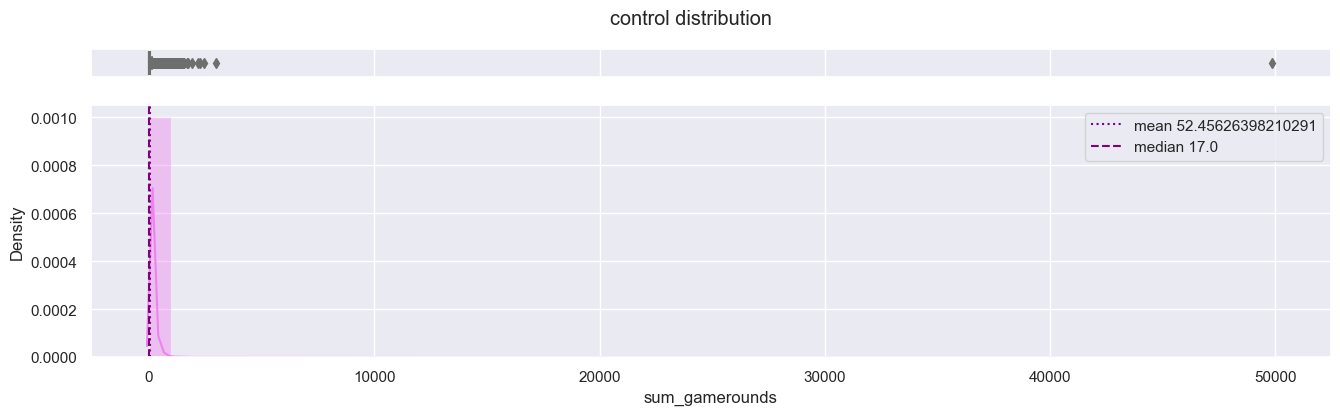

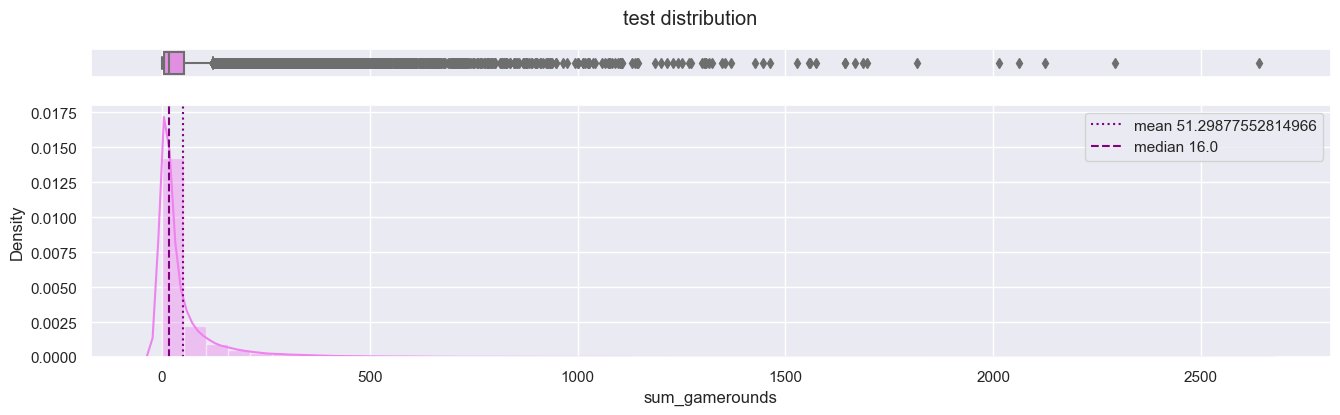

In [90]:
print('CONTROL')
display(data_statistics(df_control))
print('TEST')
display(data_statistics(df_test))
fig = px.histogram(df, x='sum_gamerounds', color="version", marginal="box", hover_data=df.columns, opacity=0.75, height=500, width=1400)
fig.update_layout(bargap=0.005, title=f'sum_gamerounds Distribution by version')
fig.show(renderer='svg')
histBoxPlot(df_control.sum_gamerounds, title='control distribution')
histBoxPlot(df_test.sum_gamerounds, title='test distribution')

## **Remove Outlier**
We will cutoff the outliers by quantil 95%

In [91]:
df_1 = df.copy()
df_control_1 = df_control.copy()
df_test_1 = df_test.copy()


df_control_1 = df_control_1[df_control_1.sum_gamerounds <= df_control_1.sum_gamerounds.quantile(0.95)]
df_test_1 = df_test_1[df_test_1.sum_gamerounds <= df_test_1.sum_gamerounds.quantile(0.95)]
df_outlier_1 = pd.concat([df_control_1, df_test_1]).reset_index(drop=True)
df_outlier_1

userid  version  sum_gamerounds  retention_1  retention_7
0          116  gate_30               3        False        False
1          337  gate_30              38         True        False
2         1066  gate_30               0        False        False
3         2101  gate_30               0        False        False
4         2179  gate_30              39         True        False
...        ...      ...             ...          ...          ...
85697  9998733  gate_40              10         True        False
85698  9999441  gate_40              97         True        False
85699  9999479  gate_40              30        False        False
85700  9999768  gate_40              51         True        False
85701  9999861  gate_40              16        False        False

[85702 rows x 5 columns]

In [92]:
print('CONTROL')
display(data_statistics(df_control_1))
print('TEST')
display(data_statistics(df_test_1))

CONTROL
NUMERIC FEATURES


count          mean           std    min        5%  \
userid          42477.0  4.990587e+06  2.880594e+06  116.0  507775.2   
sum_gamerounds  42477.0  3.323382e+01  4.413472e+01    0.0       1.0   

                      25%        50%        75%        95%        max  
userid          2505475.0  4985001.0  7482337.0  9494208.6  9999710.0  
sum_gamerounds        5.0       15.0       42.0      138.0      222.0

None

TEST
NUMERIC FEATURES


count          mean           std    min        5%  \
userid          43225.0  5.004956e+06  2.886408e+06  377.0  501323.2   
sum_gamerounds  43225.0  3.309187e+01  4.405714e+01    0.0       1.0   

                      25%        50%        75%        95%        max  
userid          2510624.0  5005676.0  7506440.0  9490304.8  9999861.0  
sum_gamerounds        4.0       15.0       43.0      137.0      220.0

None

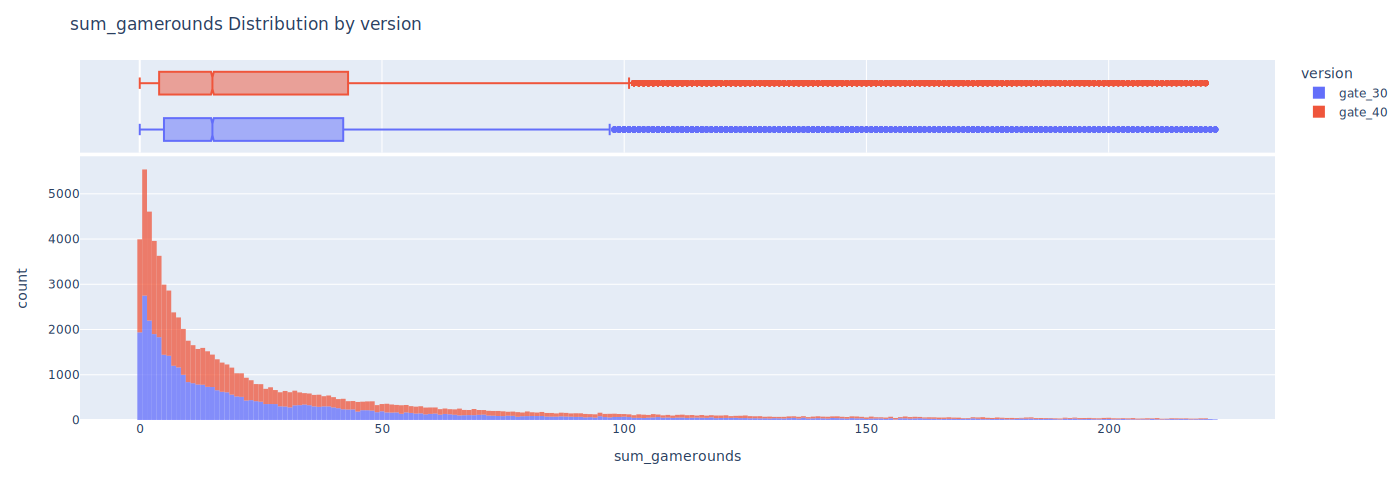

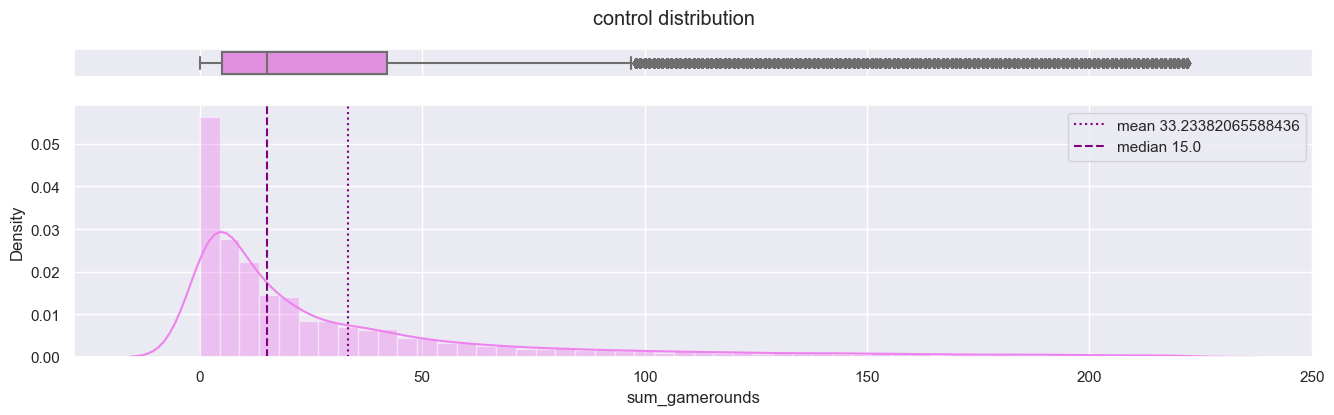

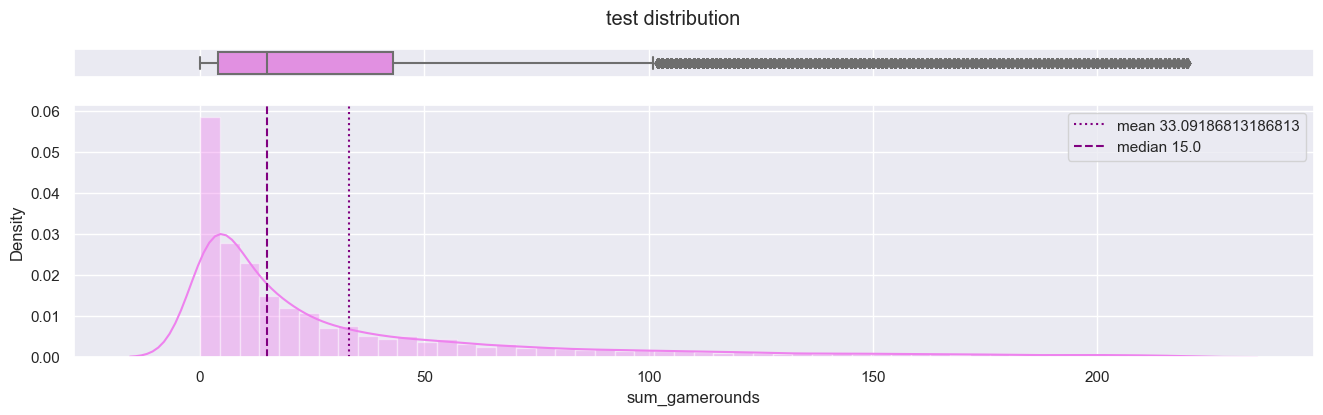

In [93]:
fig = px.histogram(df_outlier_1, x='sum_gamerounds', color="version", marginal="box", hover_data=df_outlier_1.columns, opacity=0.75, height=500, width=1400)
fig.update_layout(bargap=0.005, title=f'sum_gamerounds Distribution by version')
fig.show(renderer='svg')
histBoxPlot(df_control_1.sum_gamerounds, title='control distribution')
histBoxPlot(df_test_1.sum_gamerounds, title='test distribution')

# **A/B TESTING**

In [80]:
import scipy.stats as stats

def ab_testing(feature, control, test, alpha=0.05):
    distribution, pvalue, hypothesis = [],[],[]
    mean_control, stdev_control = control[feature].mean(), control[feature].std()
    mean_test, stdev_test = test[feature].mean(), test[feature].std()

    # The Shapiro-Wilk test: Normality
    # H0: Distribution is Normal! - p_value > 0.05  
    # H1: Distribution is not Normal! - P_value < 0.05
    shapiro_control = stats.shapiro(control[feature])
    shapiro_test = stats.shapiro(test[feature])
    if (shapiro_control.pvalue > alpha) & (shapiro_test.pvalue > alpha):
        # Normal distribution
        # The levene test: Equality of variances
        # H0: Homogeneity: - p_value > 0.05 
        # H1: Heterogeneous: - P_value < 0.05
        distribution = 'Normality'
        levene = stats.levene(control[feature], test[feature])
        if levene.pvalue > alpha:
            # Homogeneity
            # t-test: Equality of variances
            # H0: Control == Test 
            # H1: Control != Test
            test = stats.ttest_ind(control[feature], test[feature], equal_var=True) 
            pvalue = test.pvalue
            if pvalue > alpha: hypothesis = 'Fail to Reject H0'
            if pvalue < alpha: hypothesis = 'Reject H0'
        else:
            # Heterogeneous/Non-Homogeneity
            # t-test: Equality of variances
            # H0: Control == Test 
            # H1: Control != Test
            test = stats.ttest_ind(control[feature], test[feature], equal_var=False) 
            pvalue = test.pvalue
            if pvalue > alpha: hypothesis = 'Fail to Reject H0'
            if pvalue < alpha: hypothesis = 'Reject H0'
    else:
        if (shapiro_control.pvalue > alpha) & (shapiro_test.pvalue < alpha): print('check outlier in test')
        if (shapiro_control.pvalue < alpha) & (shapiro_test.pvalue > alpha): print('check outlier in control')
        # Non-Normal
        # H0: Control == Test 
        # H1: Control != Test
        distribution = 'Non-Normality'
        test = stats.mannwhitneyu(control[feature], test[feature])
        pvalue = test.pvalue
        if pvalue > alpha: hypothesis = 'Fail to Reject H0'
        if pvalue < alpha: hypothesis = 'Reject H0'
    
    return pd.DataFrame({
        'metric': [feature],
        'distribution':[distribution],
        'pvalue':[pvalue],
        'hypothesis':[hypothesis],
        'control_mean':[mean_control],
        'control_stdev':[stdev_control],
        'test_mean':[mean_test],
        'test_stdev':[stdev_test]
    })


In [94]:
ab_testing(feature='sum_gamerounds', control=df_control_1, test=df_test_1)

metric   distribution    pvalue hypothesis  control_mean  \
0  sum_gamerounds  Non-Normality  0.034768  Reject H0     33.233821   

   control_stdev  test_mean  test_stdev  
0       44.13472  33.091868   44.057144

In [95]:
df_2 = df.copy()

df_2 = df_2[df_2.sum_gamerounds < df_2.sum_gamerounds.max()]
df_control_2 = df_2[df_2.version=='gate_30']
df_test_2 = df_2[df_2.version=='gate_40']
df_outlier_2 = pd.concat([df_control_2, df_test_2]).reset_index(drop=True)

ab_testing(feature='sum_gamerounds', control=df_control_2, test=df_test_2)

metric   distribution    pvalue         hypothesis  control_mean  \
0  sum_gamerounds  Non-Normality  0.050892  Fail to Reject H0     51.342111   

   control_stdev  test_mean  test_stdev  
0     102.057598  51.298776  103.294416

In [98]:
df_2 = df.copy()

df_2 = df_2[df_2.sum_gamerounds < df_2.sum_gamerounds.max()]
df_control_2 = df_2[df_2.version=='gate_30']
df_test_2 = df_2[df_2.version=='gate_40']
df_outlier_2 = pd.concat([df_control_2, df_test_2]).reset_index(drop=True)

df_outlier_2["Retention"] = np.where((df_outlier_2.retention_1 == True) & (df_outlier_2.retention_7 == True), 1,0)
df_outlier_2["NewRetention"] = list(map(lambda x,y: str(x)+"-"+str(y), df_outlier_2.retention_1, df_outlier_2.retention_7))
df_outlier_2["version"] = np.where(df_outlier_2.version == "gate_30", "A", "B")


ab_testing(feature='sum_gamerounds', control=df_control_2, test=df_test_2)

metric   distribution    pvalue         hypothesis  control_mean  \
0  sum_gamerounds  Non-Normality  0.050892  Fail to Reject H0     51.342111   

   control_stdev  test_mean  test_stdev  
0     102.057598  51.298776  103.294416

# **CONCLUSIONS**

After applying A/B Testing, the analysis result gives us some important information. Shapiro Testing rejected H0 for Normality assumption. Therefore we needed to apply a Non-parametric test as called Mann Whitney U to compare two groups. As a result, Mann Whitney U Testing rejected H0 hypothesis and we learned A/B groups are not similar!

Briefly, There are statistically significant difference between two groups about moving first gate from level 30 to level 40 for game rounds.